# Lab 8: Define and Solve an ML Problem of Your Choosing

In [29]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [30]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(adultDataSet_filename)

df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K
5,37.0,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40.0,United-States,<=50K
6,49.0,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16.0,Jamaica,<=50K
7,52.0,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,45.0,United-States,>50K
8,31.0,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50.0,United-States,>50K
9,42.0,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,5178,0,40.0,United-States,>50K


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

## Define ML Answer
The dataset that I have chosen is the census income data set.It includes features such as age, gender, education level, occupation, income, martial status and etc. I will be using this dataset to predict whether an individual is divorced based on their demographic, economic, and social features. The label for this prediction is divorced, which we will create from the marital_status column in the dataset. Specifically, the model will classify individuals as either Divorced (1) or Not Divorced (0). This binary classification task aims to identify patterns and factors associated with divorce, providing valuable insights for social interventions and policy-making.

3. This would be a supervised learning problem, specifically a binary classification problem since the target variable has two possible outcomes: Divorced (1) and Not Divorced (0).
4. The features that will be taken into account for this problem will include age, race, education, occupation, income, hours worked per week, relationship status, and work class.
5. Predicting divorce is an important problem because it can help policymakers come up with targeted social programs to help families and prevent divorce. By identifying groups with higher divorce rates, interventions can be developed to specific marriage issues and provide necessary support before problems escalate within families. This can lead to more effective use of resources and better outcomes for families. Moreover, predictions/results from the model can help marriage counselors and therapists in providing  advice and early stage strategies, which can gelp reduce the rate of divorce and its related social and economic costs.
   
A company would also be able to create value with this model in which it can help companies offer targeted products and services such as couples counseling and legal assistance. In addition to that, it can help develop tailored employee support programs which can in turn improve well-being and productivity. As previously mentioned, counselors and therapists can also utlize this model for coming up with early stage strategies. Financial institutions and insurance companies can use this model to offer targeted products and advice, which can help reduce the financial strains that divorce can bring.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

## EDA
We will start off by looking at the basic information and statistics of the dataset, as well as checking for missing values. We will also be creating visualizations of the data.

In [31]:
# YOUR CODE HERE
# display descriptive statistics
print(df.describe())

# check for missing values
print(df.isnull().sum())

                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32399.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.589216  1.897784e+05      10.080679    615.907773     87.303830   
std       13.647862  1.055500e+05       2.572720   2420.191974    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  14084.000000   4356.000000   

       hours-per-week  
count    32236.000000  
mean        40.450428  
std         12.353748  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  
age                162
workclass         1836
fnlwgt           

In [32]:
print(df.dtypes)

df.shape

age               float64
workclass          object
fnlwgt              int64
education          object
education-num       int64
marital-status     object
occupation         object
relationship       object
race               object
sex_selfID         object
capital-gain        int64
capital-loss        int64
hours-per-week    float64
native-country     object
income_binary      object
dtype: object


(32561, 15)

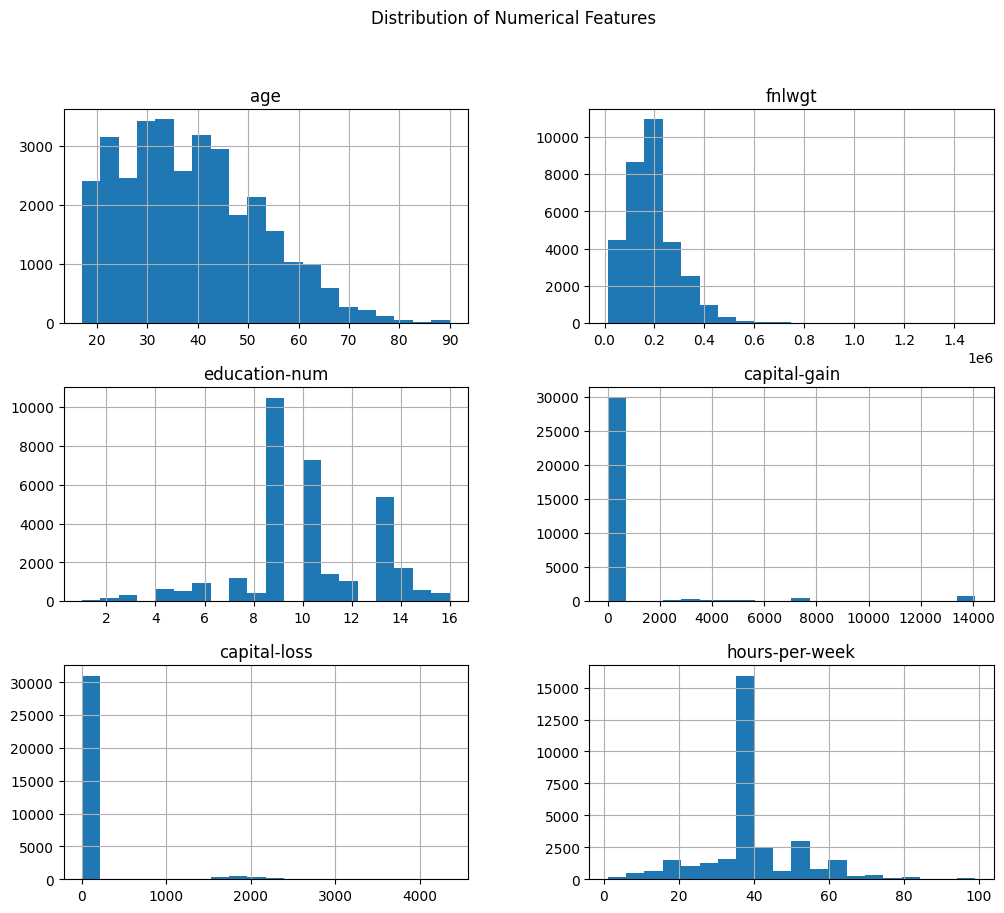

In [33]:
# histograms for numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_features].hist(figsize=(12, 10), bins=20)
plt.suptitle('Distribution of Numerical Features')
plt.show()

The age distribution shows that most individuals are between 20 and 50 years old, with a peak around 30-40 years. The capital-gain and capital-loss features are highly skewed, with most values being zero.

In [34]:
class_distribution = df['marital-status'].value_counts()
print(class_distribution)

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype: int64


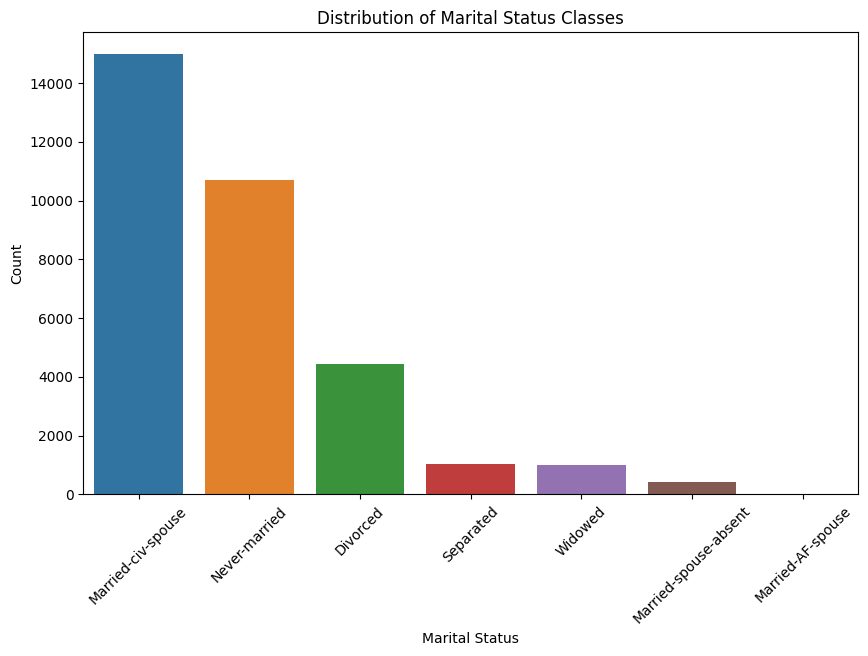

In [35]:
# visualize the class distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=class_distribution.index, y=class_distribution.values)
plt.title('Distribution of Marital Status Classes')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

From this plot we can see that there is a large populatin of married-civ-spouse and never married population, with lower divorced population, indicating that we might have to use techniques to adjust the class imbalances for the dataset to be better used for model building.

As we can see from the graph above, there are multiple class distributions among the martial status column, later on in the data processing step we will combine the married relationships into one group for us to proceed on with the binary classification of divorced or not

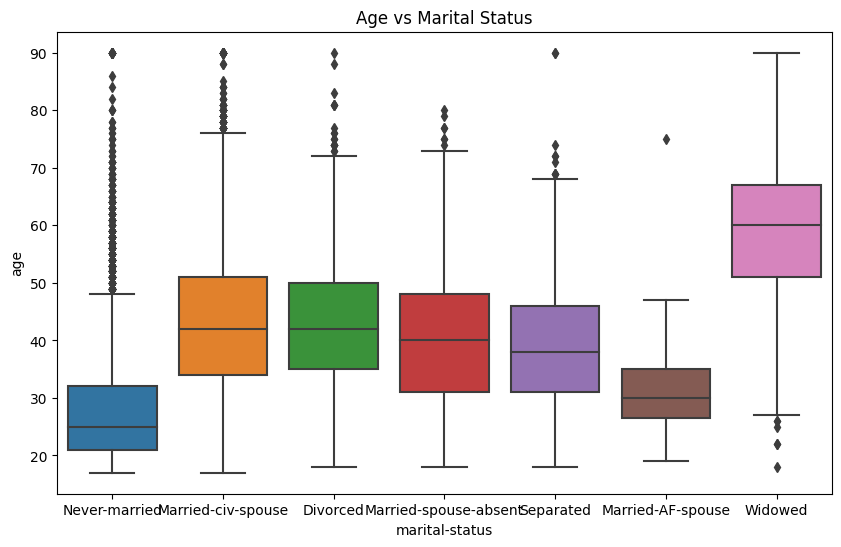

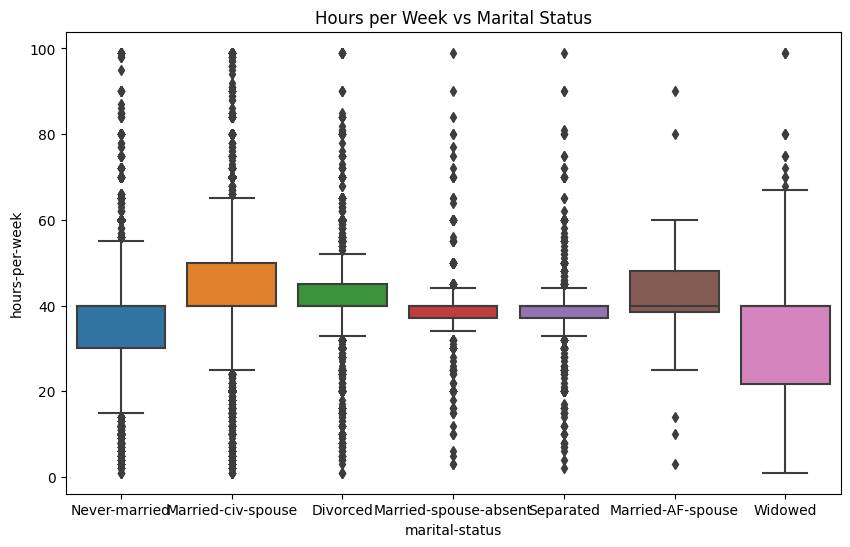

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='marital-status', y='age', data=df)
plt.title('Age vs Marital Status')
plt.show()

# relationship between hours-per-week and marital status
plt.figure(figsize=(10, 6))
sns.boxplot(x='marital-status', y='hours-per-week', data=df)
plt.title('Hours per Week vs Marital Status')
plt.show()

The age vs. marital status boxplot shows that never-married individuals tend to be younger, while married and divorced individuals are generally older, with divorced individuals having a slightly higher median age. This  indicates that age can be a important predictor of marital status, with differences between the different age groups.

The hours per week vs. marital status boxplot shows that individuals work around 40 hours per week. However, there is a spread in working hours among divorced and separated individuals, this suggests that working hours could also play a role in predicting marital status.

## Data Preparation
After we first checked for missing values in each column to identify where data imputation may be needed, using the isnull().sum method, now we can go ahead of fill in the missing values. We will fill in the numerical values with its median, and mode for categorical values (most common value is used) to make sure that it is most representative of the data. 

Before composing the missing values, we know that the martial status column is separated into different classes between married, married-separated, married spouse absent etc. For us to be able to predict the binary classification of divorced or not divorced we can adjust the data processing to create a binary classification problem where we predict whether an individual is Divorced or Married (including all types of married statuses).

0.0    15417
1.0     4443
Name: marital_status_binary, dtype: int64


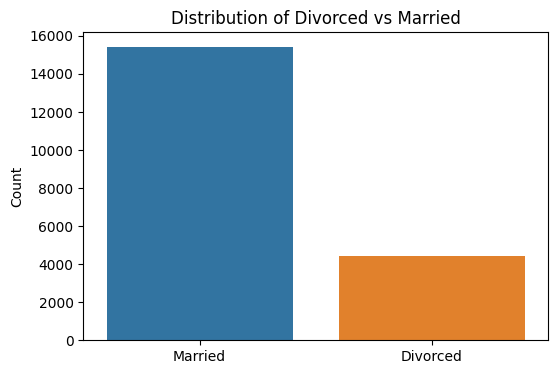

In [37]:
df['marital_status_binary'] = df['marital-status'].apply(
    lambda x: 1 if x == 'Divorced' else 0 if x in ['Married-civ-spouse', 'Married-AF-spouse', 'Married-spouse-absent'] else np.nan)

# drop rows where 'marital_status_binary' is NaN
df = df.dropna(subset=['marital_status_binary'])

class_distribution = df['marital_status_binary'].value_counts()
print(class_distribution)

# visualize class distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=class_distribution.index, y=class_distribution.values)
plt.title('Distribution of Divorced vs Married')
plt.xticks([0, 1], ['Married', 'Divorced'])
plt.ylabel('Count')
plt.show()

We will also be dropping unncessary features that are not as helpful for our prediction model or are redundant

In [38]:
df.drop(columns=['fnlwgt', 'capital-gain', 'capital-loss', 'native-country', 'marital-status'], inplace=True)

print(df.head())

    age         workclass  education  education-num         occupation  \
1  50.0  Self-emp-not-inc  Bachelors             13    Exec-managerial   
2  38.0           Private    HS-grad              9  Handlers-cleaners   
3  53.0           Private       11th              7  Handlers-cleaners   
4  28.0           Private  Bachelors             13     Prof-specialty   
5  37.0           Private    Masters             14    Exec-managerial   

    relationship   race  sex_selfID  hours-per-week income_binary  \
1        Husband  White  Non-Female            13.0         <=50K   
2  Not-in-family  White  Non-Female            40.0         <=50K   
3        Husband  Black  Non-Female            40.0         <=50K   
4           Wife  Black      Female            40.0         <=50K   
5           Wife  White      Female            40.0         <=50K   

   marital_status_binary  
1                    0.0  
2                    1.0  
3                    0.0  
4                    0.0  
5    

Imputing the missing values, we will impute numerical columns with median and categorical columns with mode to make sure that the data we impute is most representable of the overall data

In [39]:
# identify numerical and categorical columns
numeric_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# impute missing values for numerical columns with median
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# impute missing values for categorical columns with mode
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

missing_values = df.isnull().sum()
print(missing_values)


age                      0
workclass                0
education                0
education-num            0
occupation               0
relationship             0
race                     0
sex_selfID               0
hours-per-week           0
income_binary            0
marital_status_binary    0
dtype: int64


Handling outliers using winsorization

In [40]:
import scipy.stats as stats

for col in numeric_cols:
    df[col] = stats.mstats.winsorize(df[col], limits=[0.01, 0.01])

print(df[numeric_cols].describe())

                age  education-num  hours-per-week  marital_status_binary
count  19860.000000   19860.000000    19860.000000           19860.000000
mean      43.095166      10.241944       42.663847               0.223716
std       11.511439       2.620311       11.155647               0.416744
min       22.000000       3.000000        8.000000               0.000000
25%       34.000000       9.000000       40.000000               0.000000
50%       42.000000      10.000000       40.000000               0.000000
75%       51.000000      13.000000       48.000000               0.000000
max       73.000000      16.000000       80.000000               1.000000


We will also use onehot encoding to convery the binary martial status into 1 or 0, so that we can convert it to numerical feature for building our models later on

In [41]:
# One-hot encoding for categorical features
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print(df_encoded.head())

    age  education-num  hours-per-week  marital_status_binary  \
1  50.0             13            13.0                    0.0   
2  38.0              9            40.0                    1.0   
3  53.0              7            40.0                    0.0   
4  28.0             13            40.0                    0.0   
5  37.0             14            40.0                    0.0   

   workclass_Local-gov  workclass_Never-worked  workclass_Private  \
1                    0                       0                  0   
2                    0                       0                  1   
3                    0                       0                  1   
4                    0                       0                  1   
5                    0                       0                  1   

   workclass_Self-emp-inc  workclass_Self-emp-not-inc  workclass_State-gov  \
1                       0                           1                    0   
2                       0             

Scaling the features

In [42]:
from sklearn.preprocessing import StandardScaler

# Select relevant features
selected_features = ['age', 'education-num', 'hours-per-week', 'income_binary_>50K', 
                     'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private', 
                     'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc', 'workclass_State-gov', 
                     'relationship_Other-relative', 'relationship_Own-child', 
                     'relationship_Unmarried', 'relationship_Wife', 
                     'sex_selfID_Non-Female']
X = df_encoded[selected_features]
y = df_encoded['marital_status_binary']

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Verify scaling
print(pd.DataFrame(X_scaled, columns=selected_features).describe())

                age  education-num  hours-per-week  income_binary_>50K  \
count  1.986000e+04   1.986000e+04    1.986000e+04        1.986000e+04   
mean  -2.250410e-16   7.048183e-17    7.674291e-17        1.287993e-17   
std    1.000025e+00   1.000025e+00    1.000025e+00        1.000025e+00   
min   -1.832586e+00  -2.763842e+00   -3.107370e+00       -7.540534e-01   
25%   -7.901180e-01  -4.739800e-01   -2.387951e-01       -7.540534e-01   
50%   -9.513960e-02  -9.233626e-02   -2.387951e-01       -7.540534e-01   
75%    6.867111e-01   1.052595e+00    4.783485e-01        1.326166e+00   
max    2.597902e+00   2.197526e+00    3.346923e+00        1.326166e+00   

       workclass_Local-gov  workclass_Never-worked  workclass_Private  \
count         1.986000e+04            1.986000e+04       1.986000e+04   
mean         -5.151971e-17           -7.155516e-19       1.388170e-16   
std           1.000025e+00            1.000025e+00       1.000025e+00   
min          -2.768685e-01           -1.0

## Class Imbalance
Since after we combined all the married relationships together into one with divorced on the other side, our class size is imbalanced with there being much more on the married side. To adjust the class imbalance we can downsample the larger population to balance out the class.

0.0    4443
1.0    4443
Name: marital_status_binary, dtype: int64


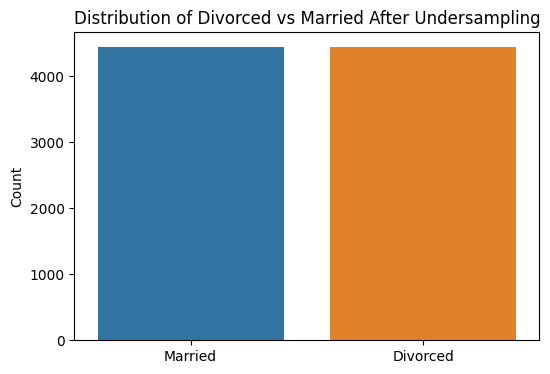

In [43]:
# separate the majority and minority classes
df_majority = df[df['marital_status_binary'] == 0]
df_minority = df[df['marital_status_binary'] == 1]

# downsample the majority class
df_majority_downsampled = df_majority.sample(len(df_minority), random_state=42)

# combine the minority class with the downsampled majority class
df_balanced = pd.concat([df_majority_downsampled, df_minority])

class_distribution_balanced = df_balanced['marital_status_binary'].value_counts()
print(class_distribution_balanced)

plt.figure(figsize=(6, 4))
sns.barplot(x=class_distribution_balanced.index, y=class_distribution_balanced.values)
plt.title('Distribution of Divorced vs Married After Undersampling')
plt.xticks([0, 1], ['Married', 'Divorced'])
plt.ylabel('Count')
plt.show()

## Model Selection and Evaluation
2. To build a balanced modeling dataset, we imputed missing values using the median for numerical columns and the mode for categorical columns. Winsorization was also applied to handle outliers. For feature engineering steps, we dropped unnecessary features and used One-hot encoding for converting categorical features into numerical values, and StandardScaler to scale the numerical features. We also downsampled the majority population of the martial status column to address class imbalance, ensuring a fair representation of the target variable classes.

After scaling the features and processing the dataset, we can now build and evaluaate our models. The models that I believe would be appropriate for this problem will be logistic regression, decision tree, and random forest tree. Logistic Regression is simple and interpretable, while Decision Tree and Random Forest can capture complex relationships. 

3. To evaluate the model's performance, we can use metrics such as accuracy, precision, recall, F1 score, and ROC-AUC score. These metrics can proide an overall view of the model’s effectiveness, in distinguishing between divorced and married individuals. We can also use a confusion matrix to understand the model's true positives, true negatives, false positives, and false negatives. To improve the model, we can perform hyperparameter tuning using GridSearchCV to find the optimal settings for our model, ensuring it generalizes well to unseen data. 

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

1. After inspecting the data, we chose to keep the following features:  age, workclass, education, education-num, occupation, relationship , race  sex_selfID  hours-per-week, income_binary  marital_status_binary. These features, I believe will be relevant for predicting marital status. We removed fnlwgt, marital-status, capital-gain, capital-loss, and native-country due to redundancy or irrelevance.

2. For the data preparation step, it has been implemented in part 3 after the EDA part. To build a balanced modeling dataset, we first looked at the sum of missing values and imputed missing values using the median for numerical columns and the mode for categorical columns. Winsorization was also applied to handle outliers in our data. For feature engineering steps, I dropped unnecessary features that I believe was not as relevant to the prediction model such as captial loss and used one-hot encoding for converting categorical features into numerical values, and standardScaler to scale the numerical features. I also downsampled the majority population of the martial status column to address class imbalance, ensuring a fair representation of the target variable classes. (divorced/not divorced）

3. We will use Logistic Regression because it's simple to understand and interpret, and it provides probabilities for each class. We will also use Decision Trees, which allow us to easily see how decisions are made based on different features. Additionally, we will use Random Forests, which combine multiple decision trees to improve accuracy and reduce the risk of overfitting. These models will help us capture both straightforward and complex relationships in the data. We will be able to compare the results among these models

4. We will split the data into training and testing sets and perform cross-validation to ensure the model generalizes well. The model's performance will also be evaluated using accuracy, precision, recall, F1 score, and ROC-AUC score. To improve the model, we will apply feature selection techniques, such as adjusting class weights, and perform hyperparameter tuning using GridSearchCV to find the optimal settings. These approaches will help us optimize our models after the building, validation, and selection process.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [44]:
# YOUR CODE HERE
from scipy.stats import mstats
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import RandomizedSearchCV

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

*Data Processing Step has been completed and implemented in part 3*, we have already finished scaling the data, now we will be splitting the data and training it for our models.

## Fit Model to Training Data and Evaluate

In [45]:
# YOUR CODE HERE
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Logistic Regression model


In [46]:
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [47]:
# Train Decision Tree model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [48]:
# Train Random Forest model
forest_model = RandomForestClassifier(random_state=42)
forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Evaluate the models

In [49]:
y_pred_logistic = logistic_model.predict(X_test)
y_pred_proba_logistic = logistic_model.predict_proba(X_test)[:, 1]

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_logistic))
print("Logistic Regression ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_logistic))

# Confusion Matrix
c_m = confusion_matrix(y_test, y_pred_logistic, labels=[1, 0])
confusion_df = pd.DataFrame(
    c_m,
    columns=['Predicted: Divorced', 'Predicted: Married'],
    index=['Actual: Divorced', 'Actual: Married']
)
print(confusion_df)

Logistic Regression Accuracy: 0.9068479355488419
Logistic Regression Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.98      0.94      3068
         1.0       0.90      0.67      0.76       904

    accuracy                           0.91      3972
   macro avg       0.90      0.82      0.85      3972
weighted avg       0.91      0.91      0.90      3972

Logistic Regression ROC-AUC Score: 0.8982477558814368
                  Predicted: Divorced  Predicted: Married
Actual: Divorced                  602                 302
Actual: Married                    68                3000


In [50]:
y_pred_tree = tree_model.predict(X_test)
y_pred_proba_tree = tree_model.predict_proba(X_test)[:, 1]

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_tree))
print("Decision Tree ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_tree))

# Confusion Matrix
c_m = confusion_matrix(y_test, y_pred_tree, labels=[1, 0])
confusion_df = pd.DataFrame(
    c_m,
    columns=['Predicted: Divorced', 'Predicted: Married'],
    index=['Actual: Divorced', 'Actual: Married']
)
print(confusion_df)

Decision Tree Accuracy: 0.87865055387714
Decision Tree Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.94      0.92      3068
         1.0       0.78      0.65      0.71       904

    accuracy                           0.88      3972
   macro avg       0.84      0.80      0.82      3972
weighted avg       0.87      0.88      0.87      3972

Decision Tree ROC-AUC Score: 0.8183192402879855
                  Predicted: Divorced  Predicted: Married
Actual: Divorced                  592                 312
Actual: Married                   170                2898


In [51]:
# Make predictions
y_pred_forest = forest_model.predict(X_test)
y_pred_proba_forest = forest_model.predict_proba(X_test)[:, 1]

# Evaluate Random Forest model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_forest))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_forest))
print("Random Forest ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_forest))

# Confusion Matrix
c_m = confusion_matrix(y_test, y_pred_forest, labels=[1, 0])
confusion_df = pd.DataFrame(
    c_m,
    columns=['Predicted: Divorced', 'Predicted: Married'],
    index=['Actual: Divorced', 'Actual: Married']
)
print(confusion_df)

Random Forest Accuracy: 0.8997985901309165
Random Forest Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.96      0.94      3068
         1.0       0.84      0.69      0.76       904

    accuracy                           0.90      3972
   macro avg       0.88      0.83      0.85      3972
weighted avg       0.90      0.90      0.90      3972

Random Forest ROC-AUC Score: 0.8766376585016904
                  Predicted: Divorced  Predicted: Married
Actual: Divorced                  625                 279
Actual: Married                   119                2949


## Analysis & Compare
The logistic regression model showed an accuracy of approximately 90.68, with high precision and recall for the 'married' class (0.0) but lower recall for the 'divorced' class (1.0), indicating that it has more difficulty with identifying divorced individuals. Then for the decision tree model, it has a slightly lower accuracy of 87.87%, with a lower precision and recall score for the 'divorced' class, suggesting it may be overfitting to the majority class. The random forest model had an accuracy of 89.98%, and there showed a higher balance of scores between precision and recall for both classes, which can indicate that is is better in handling cases with classes that are imbalanced. To conclude, logistic regression and random forest had better performance than decision tree models.

The logistic regression model had a high ROC-AUC score of 0.898, a indicating strong ability to distinguish between divorced and married individuals. The confusion matrix shows that while it correctly identified 602 divorced individuals (true positives), it also misclassified 302 married individuals as divorced (false positives), suggesting we can work on reducing false positives. The decision tree model had a lower ROC-AUC score of 0.818 and showed more overfitting, with 312 false positives and 170 false negatives. In contrast, the random forest model had a balanced performance with a ROC-AUC score of 0.877. Its confusion matrix indicated 625 true positives and 279 false positives, showing a better precision and recall compared to the decision tree. Overall, logistic regression and random forest showed a better perforamnce, with random forest providing a more balanced performance. Further improvements can be made by performing hyperparameter tuning.

## Improving Model Performance


In [52]:
# Hyperparameter tuning for Logistic Regression
param_grid_logistic = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}
grid_search_logistic = GridSearchCV(LogisticRegression(random_state=42), param_grid_logistic, cv=5, scoring='roc_auc')
grid_search_logistic.fit(X_train, y_train)

print("Best Parameters for Logistic Regression:", grid_search_logistic.best_params_)
best_logistic_model = grid_search_logistic.best_estimator_
y_pred_best_logistic = best_logistic_model.predict(X_test)
y_pred_best_logistic_proba = best_logistic_model.predict_proba(X_test)[:, 1]
print("Best Logistic Regression ROC-AUC Score:", roc_auc_score(y_test, y_pred_best_logistic_proba))

Best Parameters for Logistic Regression: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Logistic Regression ROC-AUC Score: 0.8982214350820921


In [53]:
# Hyperparameter tuning for Decision Tree
param_grid_tree = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_tree = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_tree, cv=5, scoring='roc_auc')
grid_search_tree.fit(X_train, y_train)

print("Best Parameters for Decision Tree:", grid_search_tree.best_params_)
best_tree_model = grid_search_tree.best_estimator_
y_pred_best_tree = best_tree_model.predict(X_test)
y_pred_best_tree_proba = best_tree_model.predict_proba(X_test)[:, 1]
print("Best Decision Tree ROC-AUC Score:", roc_auc_score(y_test, y_pred_best_tree_proba))

Best Parameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Decision Tree ROC-AUC Score: 0.8974364983673893


In [54]:
param_dist = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# initialize randomforestClassifier
rf_model = RandomForestClassifier(random_state=42)

# initialize randomizedsearchCV
random_search_rf = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=20,  
    cv=3,       
    scoring='roc_auc',
    random_state=42,
    n_jobs=-1   
)

# fit RandomizedSearchCV
random_search_rf.fit(X_train, y_train)

print("Best Parameters for Random Forest:", random_search_rf.best_params_)
best_rf_model = random_search_rf.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)
y_pred_best_rf_proba = best_rf_model.predict_proba(X_test)[:, 1]

print("Best Random Forest ROC-AUC Score:", roc_auc_score(y_test, y_pred_best_rf_proba))
print("Best Random Forest Classification Report:\n", classification_report(y_test, y_pred_best_rf))

Best Parameters for Random Forest: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10}
Best Random Forest ROC-AUC Score: 0.9079954656113348
Best Random Forest Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      3068
         1.0       0.91      0.70      0.79       904

    accuracy                           0.91      3972
   macro avg       0.91      0.84      0.87      3972
weighted avg       0.91      0.91      0.91      3972



After we tried hyperparameter tuning, the logistic regression model had a high ROC-AUC score of 0.898. The decision tree model also improved, with a ROC-AUC score of 0.897. The best performance came from the random forest model, with a ROC-AUC score of 0.908. The random forest model showed high precision and recall, and an overall accuracy of 91%. This model reduced false positives and false negatives, making it the most reliable for predicting marital status. Hyperparameter tuning enhanced all models, with random forest performing the best.